In [1]:
!pip install tflite-model-maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 642 kB 7.0 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 1.2 MB 55.4 MB/s 
     |████████████████████████████████| 42.6 MB 1.2 MB/s 
     |████████████████████████████████| 596 kB 61.6 MB/s 
     |████████████████████████████████| 120 kB 53.9 MB/s 
     |████████████████████████████████| 237 kB 54.1 MB/s 
     |████████████████████████████████| 3.4 MB 57.0 MB/s 
     |████████████████████████████████| 87 kB 9.0 MB/s 
     |████████████████████████████████| 10.9 MB 47.1 MB/s 
     |████████████████████████████████| 840 kB 64.7 MB/s 
     |████████████████████████████████| 1.1 MB 62.1 MB/s 
     |████████████████████████████████| 6.4 MB 41.1 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 48.3 MB 88 kB/s 
     |██████████████████████████████

In [1]:
!pip install tflite-support

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.5 MB 1.4 MB/s 


In [2]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat, QuantizationConfig
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

from tflite_support import metadata

import tensorflow as tf

In [3]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/android_figurine.zip

--2022-06-29 06:26:51--  https://storage.googleapis.com/download.tensorflow.org/data/android_figurine.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 173.194.202.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14333895 (14M) [application/zip]
Saving to: ‘android_figurine.zip’

android_figurine.zi 100%[===================>]  13.67M  --.-KB/s    in 0.1s    

2022-06-29 06:26:52 (125 MB/s) - ‘android_figurine.zip’ saved [14333895/14333895]



In [4]:
!unzip -q android_figurine.zip

In [5]:
train_data = object_detector.DataLoader.from_pascal_voc(
    'android_figurine/train',
    'android_figurine/train',
    ['android', 'pig_android']
)

val_data = object_detector.DataLoader.from_pascal_voc(
    'android_figurine/validate',
    'android_figurine/validate',
    ['android', 'pig_android']
)

INFO:tensorflow:Cache will be stored in /tmp/tmpm4s995rd with prefix filename 7bee435cfee6949ada7cad38d32e815e. Cache_prefix is /tmp/tmpm4s995rd/7bee435cfee6949ada7cad38d32e815e
INFO:tensorflow:On image 0
INFO:tensorflow:Cache will be stored in /tmp/tmpst4ses88 with prefix filename 37bf5b72d4b8074ef6db5f4341392b61. Cache_prefix is /tmp/tmpst4ses88/37bf5b72d4b8074ef6db5f4341392b61
INFO:tensorflow:On image 0


In [6]:
spec = model_spec.get("efficientdet_lite0")

In [7]:
model = object_detector.create(train_data, model_spec=spec, batch_size=4, train_whole_model=False, epochs=20, validation_data=val_data)

INFO:tensorflow:Retraining the models...
Epoch 1/20
 6/15 [===========>..................] - ETA: 0s - det_loss: 1.7395 - cls_loss: 1.1172 - box_loss: 0.0124 - reg_l2_loss: 0.0042 - loss: 1.7437 - learning_rate: 0.0075 - gradient_norm: 0.9657WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0930s vs `on_train_batch_end` time: 0.2399s). Check your callbacks.


15/15 [==============================] - 37s 602ms/step - det_loss: 1.6831 - cls_loss: 1.1002 - box_loss: 0.0117 - reg_l2_loss: 0.0042 - loss: 1.6872 - learning_rate: 0.0065 - gradient_norm: 0.9588 - val_det_loss: 1.5293 - val_cls_loss: 1.0545 - val_box_loss: 0.0095 - val_reg_l2_loss: 0.0042 - val_loss: 1.5334
Epoch 2/20
15/15 [==============================] - 6s 441ms/step - det_loss: 1.4430 - cls_loss: 1.0073 - box_loss: 0.0087 - reg_l2_loss: 0.0042 - loss: 1.4471 - learning_rate: 0.0049 - gradient_norm: 1.0772 - val_det_loss: 1.2525 - val_cls_loss: 0.9072 - val_box_loss: 0.0069 - val_reg_l2_loss: 0.0042 - val_loss: 1.2567
Epoch 3/20
15/15 [==============================] - 7s 470ms/step - det_loss: 1.2399 - cls_loss: 0.8499 - box_loss: 0.0078 - reg_l2_loss: 0.0042 - loss: 1.2441 - learning_rate: 0.0048 - gradient_norm: 1.2815 - val_det_loss: 1.1015 - val_cls_loss: 0.7897 - val_box_loss: 0.0062 - val_reg_l2_loss: 0.0042 - val_loss: 1.1056
Epoch 4/20
15/15 [==========================

In [8]:
model.export(export_dir='.', tflite_filename='android1.tflite')

INFO:tensorflow:Assets written to: /tmp/tmpw4jarchx/assets


INFO:tensorflow:Assets written to: /tmp/tmpw4jarchx/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmphqf98xpn/labelmap.txt.


INFO:tensorflow:Saving labels in /tmp/tmphqf98xpn/labelmap.txt.


INFO:tensorflow:TensorFlow Lite model exported successfully: ./android1.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./android1.tflite


In [9]:
model.evaluate_tflite('android1.tflite', val_data)

10/10 [==============================] - 27s 2s/step

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
Converting ndarray to lists...
(250, 7)
0/250
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.230
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.420
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.246
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.230
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.197
 Average Recall     (AR) @[ IoU=0.50:0.95 |

{'AP': 0.23035344,
 'AP50': 0.4201275,
 'AP75': 0.24600153,
 'AP_/android': 0.22836365,
 'AP_/pig_android': 0.23234324,
 'APl': 0.23035344,
 'APm': -1.0,
 'APs': -1.0,
 'ARl': 0.3784722,
 'ARm': -1.0,
 'ARmax1': 0.19722222,
 'ARmax10': 0.3784722,
 'ARmax100': 0.3784722,
 'ARs': -1.0}

In [12]:
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.1 MB 39 kB/s 


In [13]:
import platform
from typing import List, NamedTuple
import json

import cv2

Interpreter = tf.lite.Interpreter
load_delegate = tf.lite.experimental.load_delegate

class ObjectDetectorOptions(NamedTuple):
  """A config to initialize an object detector."""

  enable_edgetpu: bool = False
  """Enable the model to run on EdgeTPU."""

  label_allow_list: List[str] = None
  """The optional allow list of labels."""

  label_deny_list: List[str] = None
  """The optional deny list of labels."""

  max_results: int = -1
  """The maximum number of top-scored detection results to return."""

  num_threads: int = 1
  """The number of CPU threads to be used."""

  score_threshold: float = 0.0
  """The score threshold of detection results to return."""


class Rect(NamedTuple):
  """A rectangle in 2D space."""
  left: float
  top: float
  right: float
  bottom: float


class Category(NamedTuple):
  """A result of a classification task."""
  label: str
  score: float
  index: int


class Detection(NamedTuple):
  """A detected object as the result of an ObjectDetector."""
  bounding_box: Rect
  categories: List[Category]


def edgetpu_lib_name():
  """Returns the library name of EdgeTPU in the current platform."""
  return {
      'Darwin': 'libedgetpu.1.dylib',
      'Linux': 'libedgetpu.so.1',
      'Windows': 'edgetpu.dll',
  }.get(platform.system(), None)


class ObjectDetector:
  """A wrapper class for a TFLite object detection model."""

  _OUTPUT_LOCATION_NAME = 'location'
  _OUTPUT_CATEGORY_NAME = 'category'
  _OUTPUT_SCORE_NAME = 'score'
  _OUTPUT_NUMBER_NAME = 'number of detections'

  def __init__(
      self,
      model_path: str,
      options: ObjectDetectorOptions = ObjectDetectorOptions()
  ) -> None:
    """Initialize a TFLite object detection model.
    Args:
        model_path: Path to the TFLite model.
        options: The config to initialize an object detector. (Optional)
    Raises:
        ValueError: If the TFLite model is invalid.
        OSError: If the current OS isn't supported by EdgeTPU.
    """

    # Load metadata from model.
    displayer = metadata.MetadataDisplayer.with_model_file(model_path)

    # Save model metadata for preprocessing later.
    model_metadata = json.loads(displayer.get_metadata_json())
    process_units = model_metadata['subgraph_metadata'][0]['input_tensor_metadata'][0]['process_units']
    mean = 0.0
    std = 1.0
    for option in process_units:
      if option['options_type'] == 'NormalizationOptions':
        mean = option['options']['mean'][0]
        std = option['options']['std'][0]
    self._mean = mean
    self._std = std

    # Load label list from metadata.
    file_name = displayer.get_packed_associated_file_list()[0]
    label_map_file = displayer.get_associated_file_buffer(file_name).decode()
    label_list = list(filter(lambda x: len(x) > 0, label_map_file.splitlines()))
    self._label_list = label_list

    # Initialize TFLite model.
    if options.enable_edgetpu:
      if edgetpu_lib_name() is None:
        raise OSError("The current OS isn't supported by Coral EdgeTPU.")
      interpreter = Interpreter(
          model_path=model_path,
          experimental_delegates=[load_delegate(edgetpu_lib_name())],
          num_threads=options.num_threads)
    else:
      interpreter = Interpreter(
          model_path=model_path, num_threads=options.num_threads)

    interpreter.allocate_tensors()
    input_detail = interpreter.get_input_details()[0]

    sorted_output_indices = sorted(
        [output['index'] for output in interpreter.get_output_details()])
    self._output_indices = {
        self._OUTPUT_LOCATION_NAME: sorted_output_indices[0],
        self._OUTPUT_CATEGORY_NAME: sorted_output_indices[1],
        self._OUTPUT_SCORE_NAME: sorted_output_indices[2],
        self._OUTPUT_NUMBER_NAME: sorted_output_indices[3],
    }

    self._input_size = input_detail['shape'][2], input_detail['shape'][1]
    self._is_quantized_input = input_detail['dtype'] == np.uint8
    self._interpreter = interpreter
    self._options = options

  def detect(self, input_image: np.ndarray) -> List[Detection]:
    """Run detection on an input image.
    Args:
        input_image: A [height, width, 3] RGB image. Note that height and width
          can be anything since the image will be immediately resized according
          to the needs of the model within this function.
    Returns:
        A Person instance.
    """
    image_height, image_width, _ = input_image.shape

    input_tensor = self._preprocess(input_image)

    self._set_input_tensor(input_tensor)
    self._interpreter.invoke()

    # Get all output details
    boxes = self._get_output_tensor(self._OUTPUT_LOCATION_NAME)
    classes = self._get_output_tensor(self._OUTPUT_CATEGORY_NAME)
    scores = self._get_output_tensor(self._OUTPUT_SCORE_NAME)
    count = int(self._get_output_tensor(self._OUTPUT_NUMBER_NAME))

    return self._postprocess(boxes, classes, scores, count, image_width,
                             image_height)

  def _preprocess(self, input_image: np.ndarray) -> np.ndarray:
    """Preprocess the input image as required by the TFLite model."""

    # Resize the input
    input_tensor = cv2.resize(input_image, self._input_size)

    # Normalize the input if it's a float model (aka. not quantized)
    if not self._is_quantized_input:
      input_tensor = (np.float32(input_tensor) - self._mean) / self._std

    # Add batch dimension
    input_tensor = np.expand_dims(input_tensor, axis=0)

    return input_tensor

  def _set_input_tensor(self, image):
    """Sets the input tensor."""
    tensor_index = self._interpreter.get_input_details()[0]['index']
    input_tensor = self._interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image

  def _get_output_tensor(self, name):
    """Returns the output tensor at the given index."""
    output_index = self._output_indices[name]
    tensor = np.squeeze(self._interpreter.get_tensor(output_index))
    return tensor

  def _postprocess(self, boxes: np.ndarray, classes: np.ndarray,
                   scores: np.ndarray, count: int, image_width: int,
                   image_height: int) -> List[Detection]:
    """Post-process the output of TFLite model into a list of Detection objects.
    Args:
        boxes: Bounding boxes of detected objects from the TFLite model.
        classes: Class index of the detected objects from the TFLite model.
        scores: Confidence scores of the detected objects from the TFLite model.
        count: Number of detected objects from the TFLite model.
        image_width: Width of the input image.
        image_height: Height of the input image.
    Returns:
        A list of Detection objects detected by the TFLite model.
    """
    results = []

    # Parse the model output into a list of Detection entities.
    for i in range(count):
      if scores[i] >= self._options.score_threshold:
        y_min, x_min, y_max, x_max = boxes[i]
        bounding_box = Rect(
            top=int(y_min * image_height),
            left=int(x_min * image_width),
            bottom=int(y_max * image_height),
            right=int(x_max * image_width))
        class_id = int(classes[i])
        category = Category(
            score=scores[i],
            label=self._label_list[class_id],  # 0 is reserved for background
            index=class_id)
        result = Detection(bounding_box=bounding_box, categories=[category])
        results.append(result)

    # Sort detection results by score ascending
    sorted_results = sorted(
        results,
        key=lambda detection: detection.categories[0].score,
        reverse=True)

    # Filter out detections in deny list
    filtered_results = sorted_results
    if self._options.label_deny_list is not None:
      filtered_results = list(
          filter(
              lambda detection: detection.categories[0].label not in self.
              _options.label_deny_list, filtered_results))

    # Keep only detections in allow list
    if self._options.label_allow_list is not None:
      filtered_results = list(
          filter(
              lambda detection: detection.categories[0].label in self._options.
              label_allow_list, filtered_results))

    # Only return maximum of max_results detection.
    if self._options.max_results > 0:
      result_count = min(len(filtered_results), self._options.max_results)
      filtered_results = filtered_results[:result_count]

    return filtered_results


_MARGIN = 10  # pixels
_ROW_SIZE = 10  # pixels
_FONT_SIZE = 1
_FONT_THICKNESS = 1
_TEXT_COLOR = (0, 0, 255)  # red


def visualize(
    image: np.ndarray,
    detections: List[Detection],
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detections: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detections:
    # Draw bounding_box
    start_point = detection.bounding_box.left, detection.bounding_box.top
    end_point = detection.bounding_box.right, detection.bounding_box.bottom
    cv2.rectangle(image, start_point, end_point, _TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    class_name = category.label
    probability = round(category.score, 2)
    result_text = class_name + ' (' + str(probability) + ')'
    text_location = (_MARGIN + detection.bounding_box.left,
                     _MARGIN + _ROW_SIZE + detection.bounding_box.top)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                _FONT_SIZE, _TEXT_COLOR, _FONT_THICKNESS)

  return image

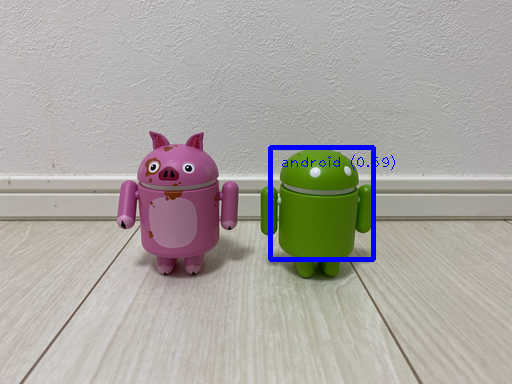

In [14]:
from PIL import Image

INPUT_IMAGE = "/content/android_figurine.jpg"
DETECTION_THRESHOLD = 0.5
TFLITE_MODEL_PATH = "android1.tflite"

image = Image.open(INPUT_IMAGE).convert('RGB')
image.thumbnail((512, 512), Image.ANTIALIAS)
image_np = np.asarray(image)

options = ObjectDetectorOptions(
      num_threads=4,
      score_threshold=DETECTION_THRESHOLD,
)
detector = ObjectDetector(model_path=TFLITE_MODEL_PATH, options=options)

detections = detector.detect(image_np)

image_np = visualize(image_np, detections)

Image.fromarray(image_np)